# CodeSoft : DataScience InternShip
# Task 01: Titanic Survival Prediction
# Author : Haroon Sajid

_________________

* Use the Titanic dataset to build a model that predicts whether apassenger on the Titanic survived or not. This is a classic beginner project with readily available data.
* The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

## 1.0 Importing Libraries

Pandas: Data manipulation and analysis library.
<br>Numpy: Numerical computing library.
<br>Matplotlib: Data visualization library.
<br>Seaborn: Statistical data visualization library.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2.0 Loading Dataset
In this section, We will import Titanic Dataset

In [3]:
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3.0 Basic Structure

In [4]:
# Lets check the shape of data
df.shape

(418, 12)

In [5]:
# Lets See the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## 4.0 Descriptive Statistics

In [6]:
# Lets See the statistics summary of dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 5.0 Data Preprocessing and Exploration (EDA)

Lets Explore all columns in dataset and also impute the missing values.

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 5.1  Identify Missing Values

In [8]:
# Lets See the missing values in dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# Percentage of missing values
df.isnull().sum() / len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

**Observation**:  We will impute missing values after explorations and understanding complete dataset: 

### 5.2 Survival

<Axes: xlabel='Sex', ylabel='count'>

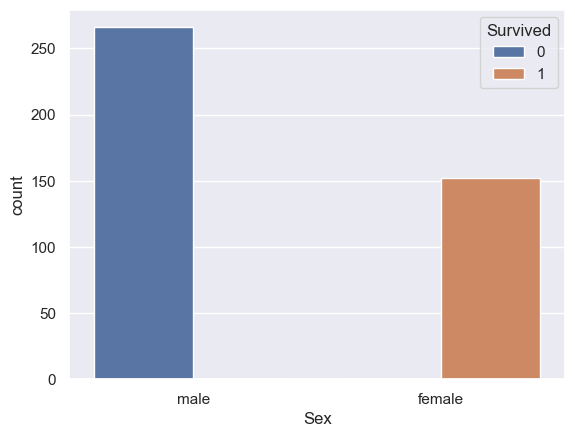

In [10]:
#Lets See survival of genders in dataset
plt.figure
sns.countplot(x='Sex', hue='Survived', data=df)

Figure_1: Shows the survived rate of genders.

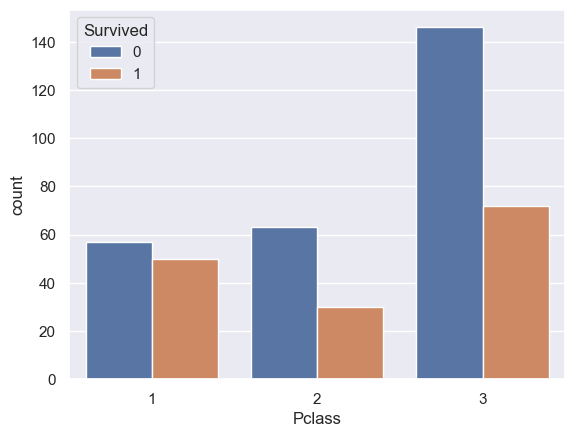

In [11]:
#Lets See the survival rate wuth respect to Pclass
sns.countplot(data = df, x = 'Pclass', hue = 'Survived' );

Figure_2: Shows the survived rate of Pclass.

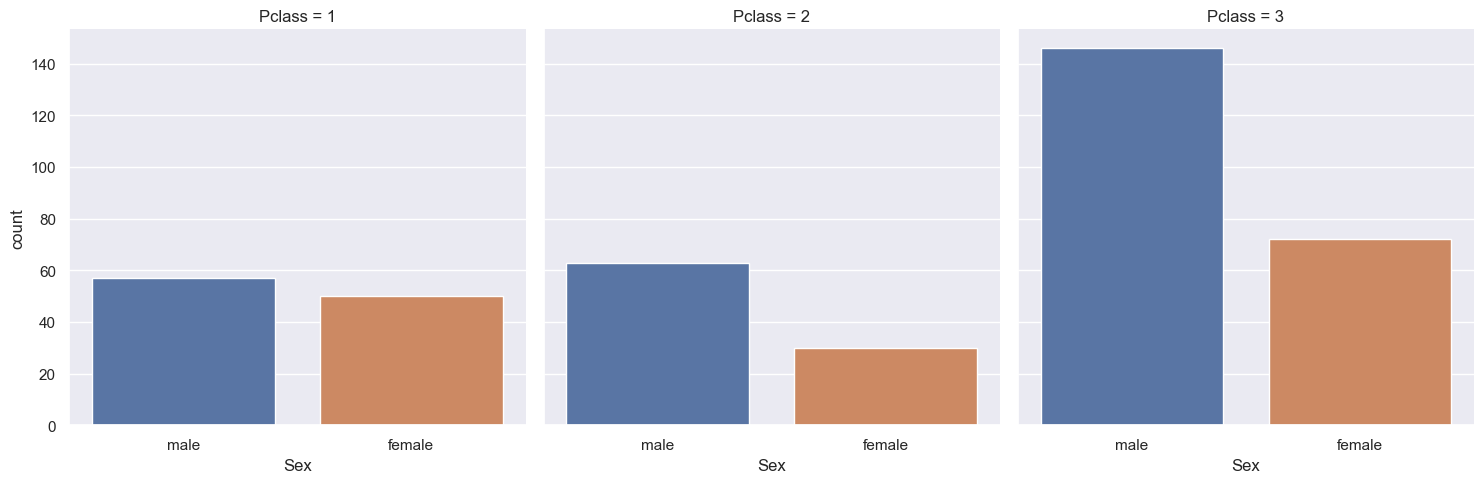

In [12]:
# Lets Create a categorical subplot of gender distribution across different P classes
sns.catplot(data = df, x = 'Sex', col = 'Pclass', kind = 'count');

**Observation**: In Pclass 2 and 3, there is a significant difference in the survival rates between males and females, but Pclass 1 having nearly equal survival rates for both genders.

Figure_3: Shows the survival of passengers' in all Pclasses.

### 5.3 Explore Names

In [13]:
df['Name'].head(10)

0                                Kelly, Mr. James
1                Wilkes, Mrs. James (Ellen Needs)
2                       Myles, Mr. Thomas Francis
3                                Wirz, Mr. Albert
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
5                      Svensson, Mr. Johan Cervin
6                            Connolly, Miss. Kate
7                    Caldwell, Mr. Albert Francis
8       Abrahim, Mrs. Joseph (Sophie Halaut Easu)
9                         Davies, Mr. John Samuel
Name: Name, dtype: object

In [14]:
# Lets extract & Analyzing the Titles
import re  # Regular expressions are powerful tools for pattern matching and manipulation of strings.
name = 'Kelly, Mr. James'
re.search(' ([A-Z][a-z]+)\.', name).group(1)


'Mr'

In [15]:
# Lets Create new column in DataFrame for extracted titles
# Apply a lambda function to each 'Name' value to search for a title using the regular expression pattern.
df['Title'] = df['Name'].apply(lambda x : re.search('([A-Z][a-z]+)\.', x).group(1))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [16]:
# Lets See the Extracted Titles
df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [17]:
# Lets Assign 'Others' to non-standard titles.
df.loc[(df['Title'].isin(['Col', 'Rev', 'Ms', 'Dr', 'Dona'])), 'Title'] = 'Others'
#lets See unique titles in dataset
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

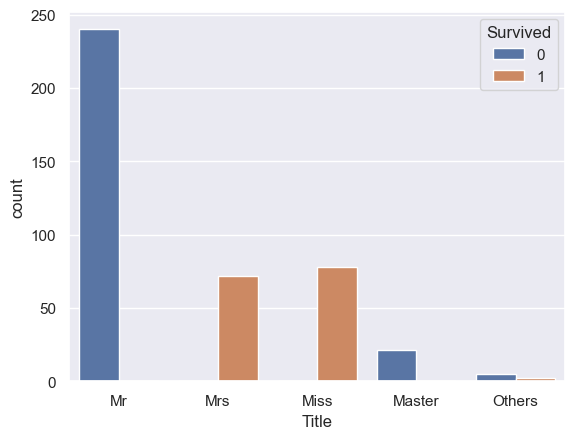

In [18]:
# Lets Visualize survival counts for different titles
sns.countplot(data = df, x='Title', hue='Survived');

Figure_4: Shows the survival counts for different titles.

### 5.4 Travelling Alone vs Groups

#### 5.4.1 Family Size

In [19]:
# Lets Create Family_Size 'Fsize' column by merging 'SibSp' and 'Parch' counts
df['Fsize'] = df['SibSp'] + df['Parch'] + 1

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3


<Axes: xlabel='Fsize', ylabel='count'>

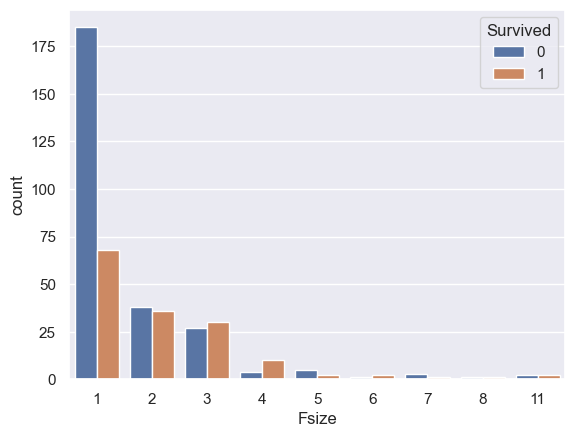

In [21]:
# Lets See the survival counts based on family size.
sns.countplot(data = df, x = 'Fsize', hue = 'Survived')

Figure_5: Shows the survival counts based on family size.

In [22]:
# Lets See the pecentage of survival rate of Fsize while creating dataframe
df.groupby('Fsize')['Survived'].value_counts(normalize = True).reset_index(name = 'perc')

,Fsize,Survived,perc
0,1,0,0.731225
1,1,1,0.268775
2,2,0,0.513514
3,2,1,0.486486
4,3,1,0.526316
5,3,0,0.473684
6,4,1,0.714286
7,4,0,0.285714
8,5,0,0.714286
9,5,1,0.285714


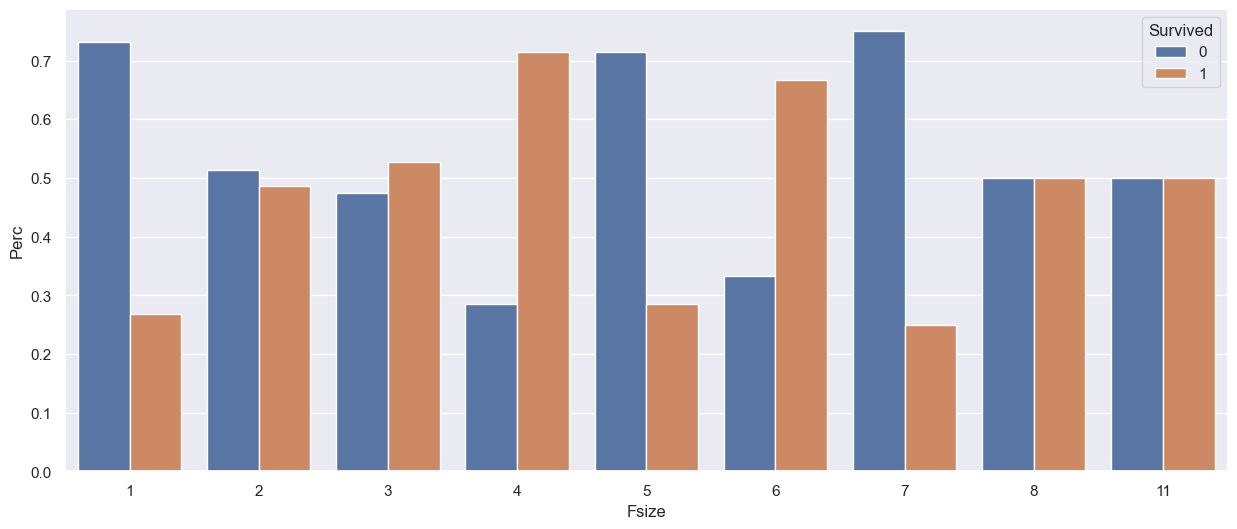

In [23]:
# Group data by family size and survival, calculate normalized counts, and create a DataFrame 'temp'.
# Lets Visualize survival percentages based on family size using a bar plot.

temp = df.groupby('Fsize')['Survived'].value_counts(normalize=True).reset_index(name='Perc')

plt.figure(figsize=(15,6));
sns.barplot(data=temp,x='Fsize', y='Perc', hue='Survived', dodge=True);

Figure_6: Shows the survival percentages based on family size using a bar plot.

#### 5.4.2 Ticket Size

In [24]:
# Lets See the 'Ticket Size' in dataset
df['Ticket'].value_counts().reset_index().head()

,index,Ticket
0,PC 17608,5
1,CA. 2343,4
2,113503,4
3,PC 17483,3
4,220845,3


In [25]:
# Lets Create a DataFrame 'dt' with ticket counts.
dt = df['Ticket'].value_counts().reset_index(name='Tsize')
dt.head()  

,index,Tsize
0,PC 17608,5
1,CA. 2343,4
2,113503,4
3,PC 17483,3
4,220845,3


In [26]:
# Merge ticket counts from 'dt' into 'df' based on 'Ticket' and remove the extra 'index' column.
df = df.merge(dt, left_on='Ticket', right_on='index', how='inner').drop('index', axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,1


In [27]:
#Lets See unique Values in Ticket
df['Tsize'].unique()

array([1, 2, 5, 3, 4], dtype=int64)

<Axes: xlabel='Tsize', ylabel='count'>

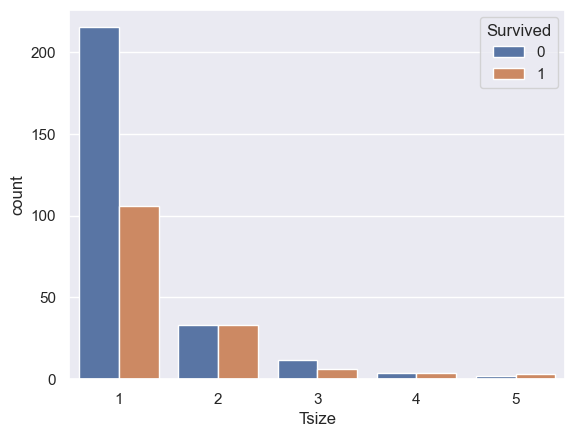

In [28]:
# Lets See Survial Rate based on Ticket Size
sns.countplot(data = df, x = 'Tsize', hue = 'Survived')

Figure_7: Visualize survival counts based on ticket size.

#### 5.4.3 Consolidating family & friends

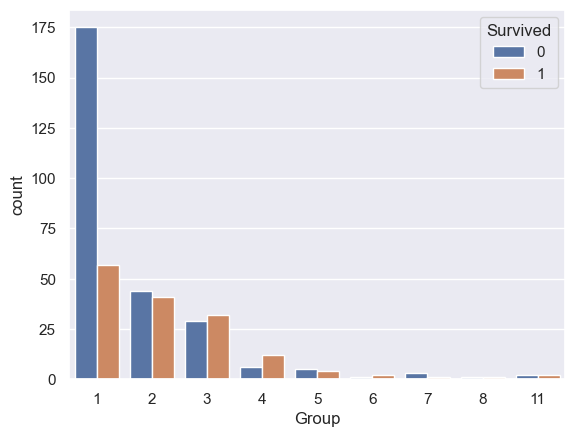

In [29]:
# Lets Create 'Group' column with larger of ticket size and family size.
df['Group'] = df[['Tsize', 'Fsize']].max(axis=1)  
sns.countplot(data = df, x = 'Group', hue = 'Survived');

Figure_8: Shows the survival counts based group size.

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,1,3


In [31]:
# Lets Creating a Group Size Column in our DataFrame
df['GrupSize'] = ''  # Initialize the 'GrupSize' column.
df.loc[df['Group'] == 1, 'GrupSize'] = 'solo'  # Label rows with 'Group' size of 1 as 'solo'.
df.loc[df['Group'] == 2, 'GrupSize'] = 'couple'  # Label rows with 'Group' size of 2 as 'couple'.
df.loc[(df['Group'] >= 3) & (df['Group'] <= 4), 'GrupSize'] = 'group'  # Label rows with 'Group' size between 3 and 4 as 'group'.
df.loc[df['Group'] > 4, 'GrupSize'] = 'large_group'  # Label rows with 'Group' size greater than 4 as 'large_group'.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrupSize
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,1,solo
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,2,couple
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,1,solo
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,1,solo
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,1,3,group


<Axes: xlabel='GrupSize', ylabel='count'>

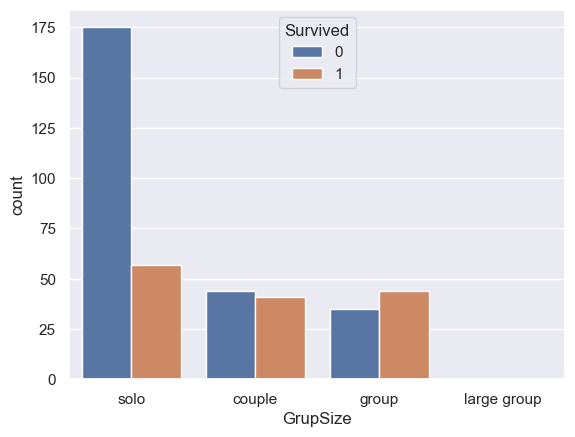

In [32]:
# Lets visualize survival counts based on grouped sizes.
sns.countplot(x='GrupSize', hue='Survived', order=['solo', 'couple', 'group', 'large group'], data=df)

Figure_9: Shows the survival counts based on grouped sizes.

### 5.5 Effect of Fare

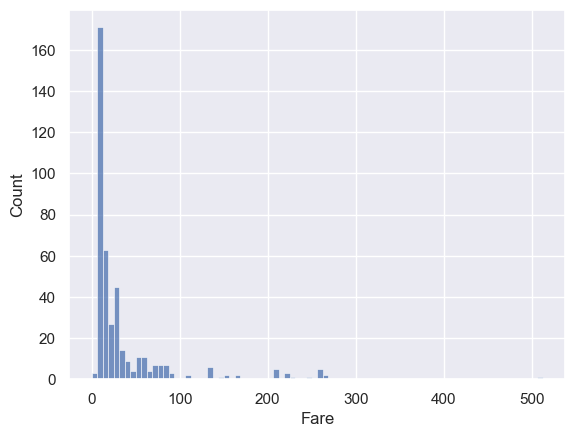

In [33]:
# Lets See the fare of Passengers in dataset.
sns.histplot(data = df['Fare']);

Figure_10: Shows the fare of Passengers in dataset.

In [34]:
# Lets See null values in Fare
df['Fare'].isnull().sum()

1

In [35]:
# Lets Filter rows with NaN Fare value in the DataFrame.
df.loc[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrupSize
172,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,1,1,1,solo


In [36]:
df.loc[df['Pclass'] == 3, 'Fare'].median()

7.8958

In [37]:
# Fill missing values in 'Fare' with the median of Pclass 3
df['Fare'].fillna(df[df['Pclass'] == 3]['Fare'].median(), inplace=True)

# Now Lets See missing values in'Fare'
df['Fare'].isnull().sum()

0

In [38]:
# Lets Display passengers whose fare is 0
df[df['Fare'] == 0]  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrupSize
294,1158,0,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,Mr,1,1,1,solo
383,1264,0,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,Mr,1,1,1,solo


We can See that , these two passengers have zero fare in Pclass 1:


In [39]:
#Lets See the median Fare of class 1
df.loc[df['Pclass']==1,'Fare'].median()

60.0

In [40]:
df.loc[(df['Fare']==0) & (df['Pclass']==1), 'Fare'] = df[df['Pclass']==1]['Fare'].median()

#### 5.4.1 Assigning categories to fare

In [41]:
# Lets Create Categories of 'Fare' column;
df['FareCat'] = '' # Initialize 'FareCat' column
df.loc[df['Fare'] <= 10, 'FareCat'] =  '0_10'  # Categorize fares 0-10.
df.loc[(df['Fare'] > 10) & (df['Fare'] <= 25), 'FareCat'] = '10_25'  # Categorize fares 10-25.
df.loc[(df['Fare'] > 25) & (df['Fare'] <= 40), 'FareCat'] = '25_40'  # Categorize fares 25_40.
df.loc[(df['Fare'] > 40) & (df['Fare'] <= 70), 'FareCat'] = '40_70'  # Categorize fares 40_70
df.loc[(df['Fare'] > 70) & (df['Fare'] <= 100),'FareCat'] = '70_100' # Categorize fares 70_100
df.loc[(df['Fare'] > 100), 'FareCat'] = '100+' # Categorize fares above 100 

# Lets See 'FareCat' column in DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrupSize,FareCat
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,1,solo,0_10
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,2,couple,0_10
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,1,solo,0_10
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,1,solo,0_10
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,1,3,group,10_25


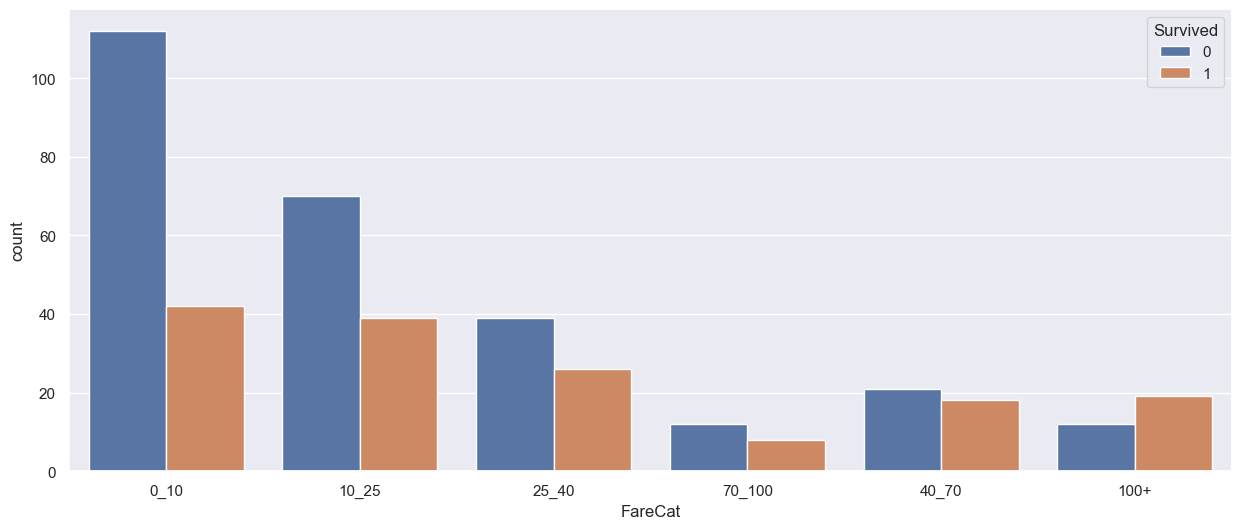

In [42]:
# Lets Visualize survival counts based on fare categories.
plt.subplots(figsize=(15,6)) 
sns.countplot(x='FareCat', hue='Survived', data=df); 

Figure_11: Shows the survival counts based on fare categories.

### 5.6 Effect of Embarked 
C = Cherbourg(France), Q = Queenstown(Ireland), S = Southampton(England)

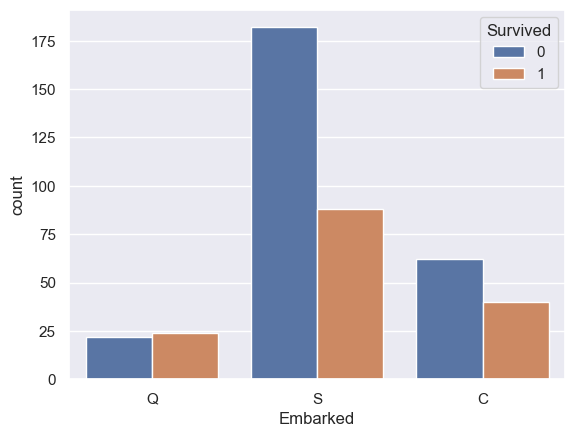

In [43]:
#Lets Visualize survival counts based on embarked points.
sns.countplot(data = df, x = 'Embarked', hue = 'Survived');

Figure_12: Shows the survival counts based on embarked points.

### 5.7 Effect of Age

In [44]:
# Lets See missing values in age column
df['Age'].isnull().sum()

86

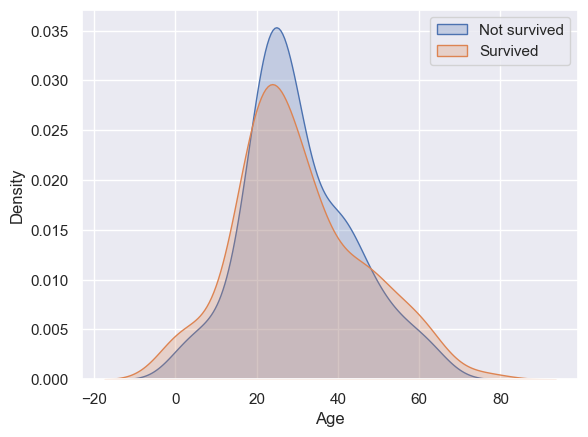

In [45]:
# KDE plot for ages of passengers who survive and not.
sns.kdeplot(df[df['Survived'] == 0]['Age'].dropna(), fill=True, label="Not survived")  
sns.kdeplot(df[df['Survived'] == 1]['Age'].dropna(), fill=True, label="Survived")  
plt.legend() 
plt.show() 

Figure_13: Shows the KDE plot for ages of passengers who survive and not..

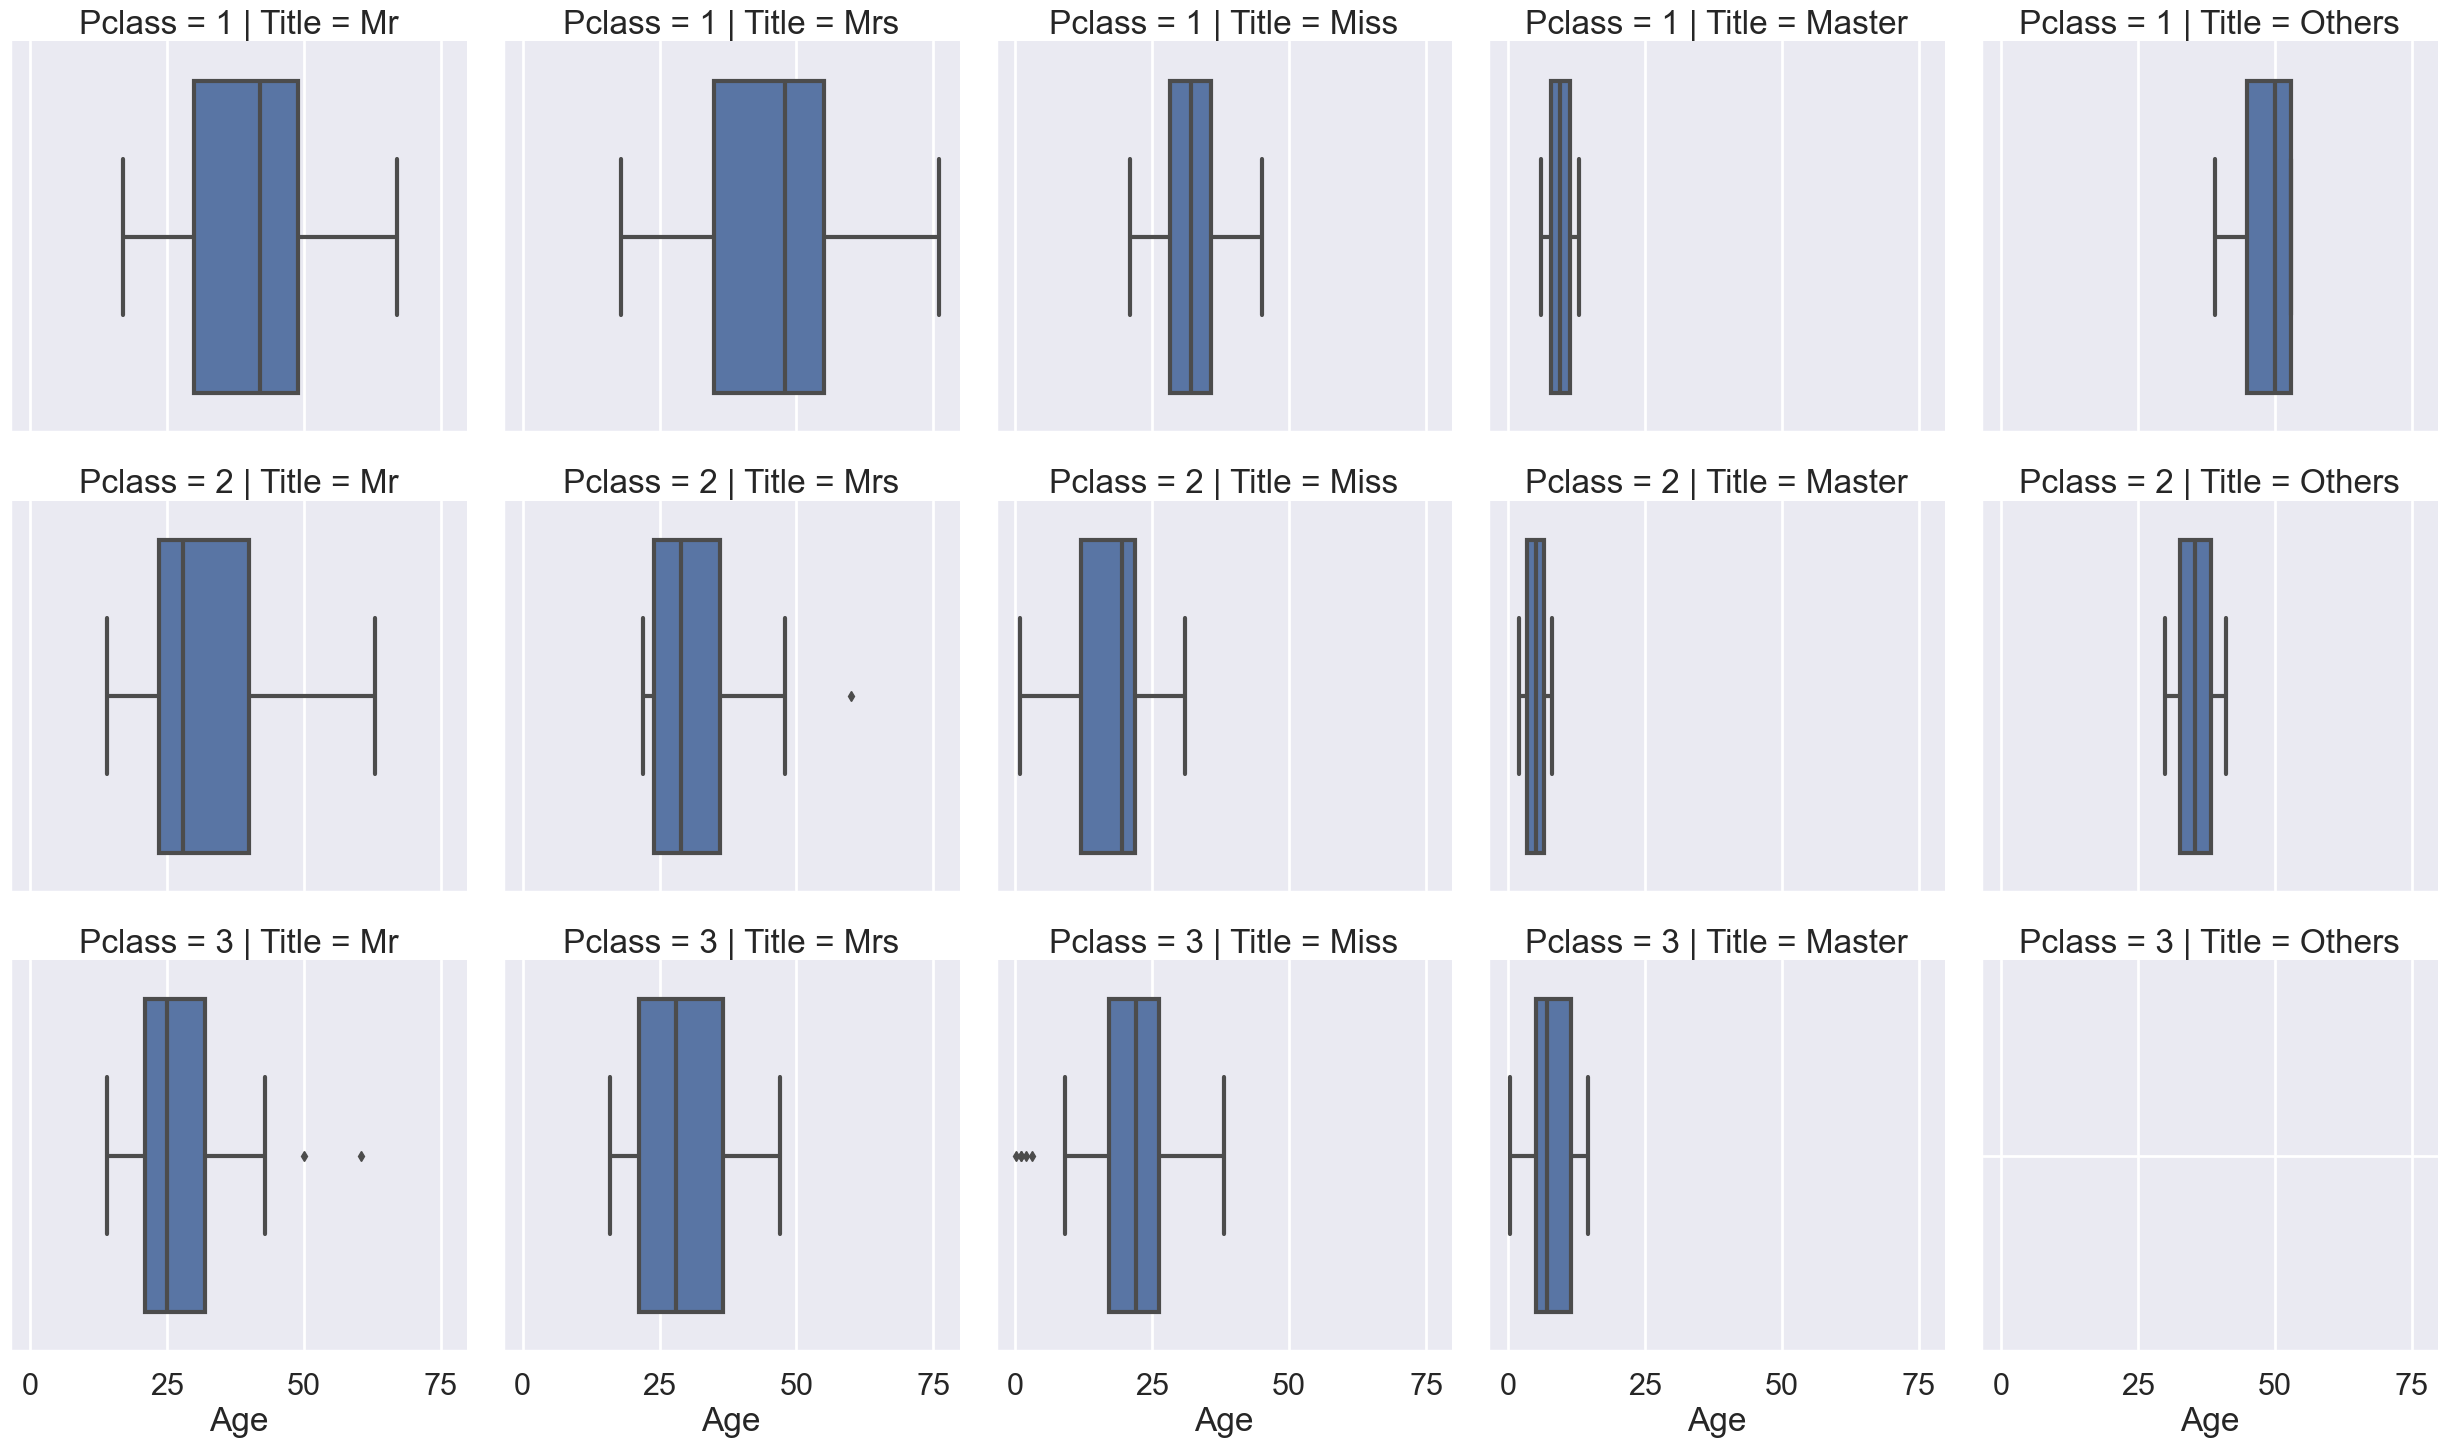

In [46]:
# Lets Create a DataFrame 'df_age' with non-null 'Age' values from DataFrame 'df'.
df_age = df[df['Age'].isnull() == False]

# Lets Create a categorical subplots of age distribution by title and passenger class using box plots.

sns.set_context('poster')  # Set the plotting context to 'poster' size.
sns.catplot(data=df_age, x='Age', col='Title', row='Pclass', kind='box') 

Figure_14: Shows the categorical subplot of age distribution by title and passenger class using box plots.

In [47]:
# Iterate through unique titles and passenger classes to fill missing 'Age' values with the median age of respective groups.
for t in df['Title'].unique():
    for p in df['Pclass'].unique():
        df.loc[(df['Title'] == t) & (df['Pclass'] == p) & (df['Age'].isnull()), 'Age'] = df.loc[(df['Title'] == t) & (df['Pclass'] == p), 'Age'].median()

In [48]:
#Lets See the missing values in age column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Fsize            0
Tsize            0
Group            0
GrupSize         0
FareCat          0
dtype: int64

In [49]:
# Lets Filter rows with NaN Age value in the DataFrame which is still null after imputation.
df.loc[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrupSize,FareCat
105,980,1,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Others,1,1,1,solo,0_10


#### Conclusion:
As We can See in Figure_14, Pclass 3 with Title Others, is Empty, So the it did'nt impute with its median.
<br>So Now, We will impute 1 null value in Age Column with median of age in Pclass 3

In [50]:
df.loc[df['Pclass'] == 3, 'Age'].median()

25.0

In [51]:
# Lets impute remaining missing value in 'Age' column;
df.loc[df['Age'].isnull()] = df.loc[(df['Pclass'] == 3), 'Age'].median()

In [52]:
df['Age'].isnull().sum()

0

#### 5.7.1 Creating Age categories

In [53]:
df['AgeCat'] = ''  # Initialize 'AgeCat' column.
df.loc[df['Age'] <= 16, 'AgeCat'] = '0_16'  # Categorize ages 0-16.
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'AgeCat'] = '16_32'  # Categorize ages 16-32.
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'AgeCat'] = '32_48'  # Categorize ages 32-48.
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'AgeCat'] = '48_64'  # Categorize ages 48-64.
df.loc[df['Age'] > 64, 'AgeCat'] = '64+'  # Categorize ages above 64.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fsize,Tsize,Group,GrupSize,FareCat,AgeCat
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,1,solo,0_10,32_48
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,1,2,couple,0_10,32_48
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,1,solo,0_10,48_64
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,1,solo,0_10,16_32
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,1,3,group,10_25,16_32


### 5.8 Cabin Column

In [54]:
# Lets Remove the 'Cabin' column from the DataFrame 'df'.
df.drop(['Cabin'], axis=1, inplace=True)

In [55]:
#Lets Check the missing valus 
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Fsize          0
Tsize          0
Group          0
GrupSize       0
FareCat        0
AgeCat         0
dtype: int64

In [56]:
# Lets Check missing values in DataFrame after Impution;
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Fsize          0
Tsize          0
Group          0
GrupSize       0
FareCat        0
AgeCat         0
dtype: int64

**Milestone 01**: Missing values have been successfully imputed.

## 6.0. Feature Selection

C:\Users\Grace\AppData\Local\Temp\ipykernel_8916\3128588535.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.drop('PassengerId', axis=1).corr()


<Axes: >

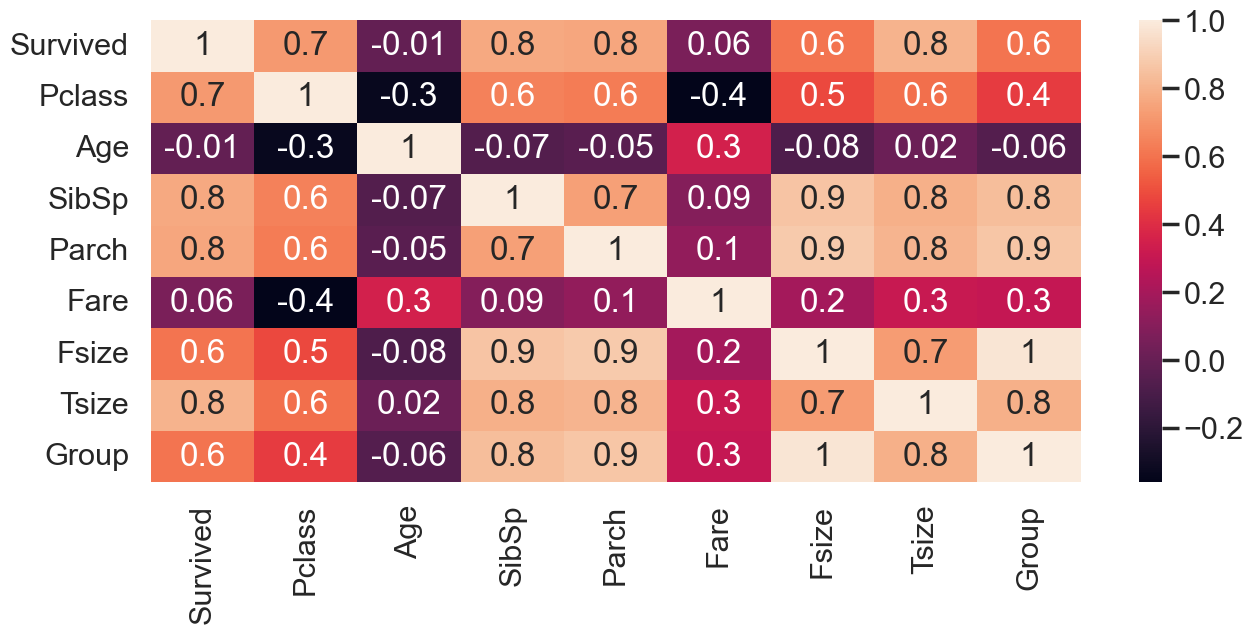

In [57]:
# Lets Create a heatmap of the correlation matrix with annotations.
# Calculate the correlation matrix without 'PassengerId'.
# Set the plotting context to 'poster' size.
sns.set_context('poster') 
plt.figure(figsize=(15,6)) 
cor = df.drop('PassengerId', axis=1).corr()  
sns.heatmap(cor, annot=True, fmt='.1g')  

Figure_14: Shows a heatmap of the correlation matrix with annotations of numeric valus.

### Observation 02

The above heat map shows the corelation of different columns with eachother. A heatmap often helps to view the corelation as seen above. Looking at the above heatmap we can conclude that which attributes or columns are corelated and and can be removed to get a better shaped dataset.

The following points are to be considered for dropping the columns

'Group' holds a corelation of 0.8 with TFsize' and 1 with 'Fsize'. So we will remove 'Group' and 'Tsize' because related data can be found in 'GrpSize'.
'Fsize' still has a corelation of 0.9 with 'SibSp' and 'Parch'.So we will remove 'Fsize' because 'SibSp' and 'Parch' are providing the required information.
The 'Name' column can also be removed because 'Title' has been extracted.
Similarly 'Age' and 'Fare' can also be removed because 'AgeCat' and 'FareCat' provide the related information.
<br>So the final columns to be dropped are: 'Name','Age','Fare','Ticket','Fsize','Tsize' and 'Group'

In [58]:
# List of columns to be dropped from DataFrame 'df'.
drop_features = ['Name', 'Age', 'Fare', 'Ticket', 'Fsize', 'Tsize', 'Group'] 

### 6.1 Selecting Final Features

In [59]:
# Lets Remove columns listed in 'drop_features' from DataFrame 'df'.
df.drop(drop_features, axis=1, inplace=True) 

In [60]:
# Lets See final featutes;
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrupSize,FareCat,AgeCat
0,892,0,3,male,0,0,Q,Mr,solo,0_10,32_48
1,893,1,3,female,1,0,S,Mrs,couple,0_10,32_48
2,894,0,2,male,0,0,Q,Mr,solo,0_10,48_64
3,895,0,3,male,0,0,S,Mr,solo,0_10,16_32
4,896,1,3,female,1,1,S,Mrs,group,10_25,16_32


## 7.0 Summary
Here's a summary of the tasks and operations performed on the Titanic dataset without including the actual code:

Handling Missing Values:
- Filled missing 'Age' values with median ages based on 'Title' and 'Pclass'.
- Filled missing 'Fare' value with median Fares based on 'Pclass'.
- Dropping 'Cabin' from DataFrame which have maximum missing valus and not important.

Feature Engineering:

- Created 'Fsize' by combining the number of siblings, spouses ('SibSp'), and parents, children ('Parch').
- Created 'Tsize' by counting the occurrences of each ticket.
- Created 'Group' based on the larger value between 'Tsize' and 'Fsize'.
- Categorized ages into 'AgeCat' based on predefined ranges.

Data Visualization:

- Visualized survival counts based on titles using a bar plot.
- Created a grid of box plots to showcase age distributions across titles and passenger classes.
- Visualized survival counts based on grouped sizes using a count plot.
- Displayed Kernel Density Estimate (KDE) plots to compare age distributions of survivors and non-survivors.

Feature Selection:

- Removed irrelevant or redundant columns ('Name', 'Age', 'Fare', 'Ticket', 'Fsize', 'Tsize', 'Group').
- These tasks collectively aimed to preprocess and analyze the Titanic dataset, ensuring it's in a suitable format for further analysis and modeling.

## 8.0 Model Selection & Prediction

### 8.1 Importing Libraries

In [61]:
# Import necessary libraries from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import auc, roc_curve, roc_auc_score

### 8.1 Applying Logistic Regression for Predictive Modeling

**Logistic Regression** is a statistical model used for binary classification, making it suitable for predicting outcomes with two possible values, such as survival (1) or not (0) in the Titanic dataset. I chose Logistic Regression for the Titanic dataset because it's well-suited to handle such binary classification tasks and is a simple yet effective algorithm for predicting whether passengers survived or not based on available features.

### 8.2 Data Preprocessing

In [62]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrupSize,FareCat,AgeCat
0,892,0,3,male,0,0,Q,Mr,solo,0_10,32_48
1,893,1,3,female,1,0,S,Mrs,couple,0_10,32_48
2,894,0,2,male,0,0,Q,Mr,solo,0_10,48_64
3,895,0,3,male,0,0,S,Mr,solo,0_10,16_32
4,896,1,3,female,1,1,S,Mrs,group,10_25,16_32


In [63]:
# Lets do onehot encoding on categorical variables
df_OneHot = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'GrupSize', 'FareCat', 'AgeCat'])
df_OneHot.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Pclass_25,Sex_25.0,Sex_female,...,FareCat_100+,FareCat_10_25,FareCat_25_40,FareCat_40_70,FareCat_70_100,AgeCat_0_16,AgeCat_16_32,AgeCat_32_48,AgeCat_48_64,AgeCat_64+
0,892,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,893,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,894,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,895,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,896,1,1,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [64]:
df = df_OneHot.copy()

### 8.2 Create Dependent and Independent Variables

In [65]:
# Lets Create 'X' Independent variable and y dependent variable;
X = df.drop(columns = ['PassengerId', 'Survived'])
y = df['Survived']

### 8.3 Train Test Split Data

In [66]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3, random_state = 30)
# Lets See shape of train and test dataset;
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(292, 36) (292,)
(126, 36) (126,)


### 8.3 Model Training

In [67]:
# Lets train the model on training dataset
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression()

#### Evaluation model

In [68]:
y_pred = lr.predict(xtest)
# lets Predicting prabability of 0 and 1
pred_prb = lr.predict_proba(xtest)

# Lets Only predicting and extracting probability values of 1
lr_pred_prb = pred_prb[:, 1]

#### Comparison of Predicted and Actual

In [69]:
# Lets Create a copy of the 'xtest' DataFrame to 'xt'
xt = xtest.copy()
xt['y_pred'] = y_pred
xt['pred_probability'] = lr_pred_prb
xt['actual'] = ytest
xt.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Pclass_25,Sex_25.0,Sex_female,Sex_male,Embarked_25.0,...,FareCat_40_70,FareCat_70_100,AgeCat_0_16,AgeCat_16_32,AgeCat_32_48,AgeCat_48_64,AgeCat_64+,y_pred,pred_probability,actual
345,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0.005954,0
378,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0.983676,1
178,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0.005184,0
367,0,1,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0.990015,1
191,3,1,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0.005727,0


### 8.4 Performance of Model

The performance of a model is typically evaluated by measuring how accurately it predicts outcomes or classifies data, with common metrics including accuracy, precision, recall, F1-score, and ROC-AUC etc.

**Accuracy** ____ | ____ **Precision** _____ | ____  **Recall** ___ | ____ **F1_Score**


In [70]:
# Lets Check the accuracy, precision, recall and f1 score of model
print('accuracy_score: ',accuracy_score(y_pred, ytest))
print('precision_score:',precision_score(y_pred, ytest))
print('recall_score:   ',recall_score(y_pred, ytest))
print('f1_score:       ',f1_score(y_pred, ytest))

accuracy_score:  1.0
precision_score: 1.0
recall_score:    1.0
f1_score:        1.0


#### Confusion Matrix

In [71]:
# Lets Check the confusion metrix score
confusion_matrix(ytest, y_pred)

array([[76,  0],
       [ 0, 50]], dtype=int64)

### 11.5 Classification Report

In [72]:
# Lets get report of precision recall and f1 score
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



### 11.6 ROC AUC Curve

In [73]:
# Lets check ROC_AUC score from ytest and predicted probabilities
auc_lr = roc_auc_score(y_pred, lr_pred_prb)
auc_lr

1.0

## 12.0 Conclusion

The Titanic dataset, consisting of 418 rows and 12 columns, perform exploratory data analysis (EDA) and Then subjected to a logistic regression machine learning model. Surprisingly, the model achieved near-perfect performance metrics with an accuracy, precision, recall, F1 score, and ROC AUC all equal to 1. This exceptional outcome may indicate potential overfitting, data leakage, or a flaw in the modeling process. Further investigation is required to validate the results and ensure the model's robustness in real-world scenarios. Careful consideration of feature engineering and model evaluation techniques is essential to avoid unrealistic performance assessments.